In [7]:
import numpy as np

class Counter(dict):
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0:
            self[item] = new_val

def y(x):
    return 2**x

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)
    
    X = [2**i for i in range(N)][::-1]

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)
        else:

            i,j = E[np.random.randint(M)]

            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R


In [3]:
N =  400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.5, 25)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []
p_mixing_timeother = []

for i in range(len(b)):
    t_p_mixing = 0
    t_p_mixing64 = 0
    for j in range(15):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        p_mix_index64 = np.min(np.where(R==np.round(N/30))[0])
        t_p_mixing += times[p_mix_index]
        t_p_mixing64 += times[p_mix_index64]
    p_mixing_timeother.append(t_p_mixing64/15)
    p_mixing_times.append(t_p_mixing/15)
    print(t_p_mixing/15)
    print(t_p_mixing64/15)

print(p_mixing_times)
print(p_mixing_timeother)

5.748965597393508
3.404990905956843
6.4932257297034415
3.6268318149065095
6.611945978572917
3.888097525506725
7.237020437991019
4.163013986222101
8.878855595856727
4.388890649539834
10.861484528010429
4.971896163174664
12.430204887167871
5.514985227534429
15.691365008691001
6.28266602924042
21.677607904927303
7.550213504172503
34.415197685246206
9.125360512674938
40.878394642253745
12.963053926385365
30.609059468491356
17.030194934683294
27.10426243400086
15.864110661672509
24.2074797344773
14.667485304140678
21.147815255934386
14.015277990390928
19.436375548614226
12.57086941443463
16.071422212769683
11.644065679102017
16.75754986243625
10.780436974281
14.956762041409235
10.09020574374637
13.129117774032771
9.4724831913544
13.511001810033994
8.989375520089146
12.111887817900845
8.565452083809657
11.55894864227589
8.12574184887412
11.321747325714478
7.664257470118205
9.923810702115441
7.299871993254873
[5.748965597393508, 6.4932257297034415, 6.611945978572917, 7.237020437991019, 8.8788

In [11]:
pmixing = [5.748965597393508, 6.4932257297034415, 6.611945978572917, 7.237020437991019, 8.878855595856727, 10.861484528010429, 12.430204887167871, 15.691365008691001, 21.677607904927303, 34.415197685246206, 40.878394642253745, 30.609059468491356, 27.10426243400086, 24.2074797344773, 21.147815255934386, 19.436375548614226, 16.071422212769683, 16.75754986243625, 14.956762041409235, 13.129117774032771, 13.511001810033994, 12.111887817900845, 11.55894864227589, 11.321747325714478, 9.923810702115441]
pmixingn301 = [3.404990905956843, 3.6268318149065095, 3.888097525506725, 4.163013986222101, 4.388890649539834, 4.971896163174664, 5.514985227534429, 6.28266602924042, 7.550213504172503, 9.125360512674938, 12.963053926385365, 17.030194934683294, 15.864110661672509, 14.667485304140678, 14.015277990390928, 12.57086941443463, 11.644065679102017, 10.780436974281, 10.09020574374637, 9.4724831913544, 8.989375520089146, 8.565452083809657, 8.12574184887412, 7.664257470118205, 7.299871993254873]


In [4]:
N =  1600
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.5, 25)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []
p_mixing_timeother = []

for i in range(len(b)):
    t_p_mixing = 0
    t_p_mixing64 = 0
    for j in range(15):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        p_mix_index64 = np.min(np.where(R==np.round(N/30))[0])
        t_p_mixing += times[p_mix_index]
        t_p_mixing64 += times[p_mix_index64]
    p_mixing_timeother.append(t_p_mixing64/15)
    p_mixing_times.append(t_p_mixing/15)
    print(t_p_mixing/15)
    print(t_p_mixing64/15)

print(p_mixing_times)
print(p_mixing_timeother)

7.160100631237134
3.410531385037989
7.3973642131436685
3.6076379591630428
8.285075686451727
3.853863066529058
9.383711089775138
4.179924336409568
11.900254646313025
4.5390746946570975
13.519252337700033
4.9261732569363135
18.3709103078782
5.6565939448656595
23.895550642731262
6.40204904917403
38.34595958566885
7.8950387825444865
79.97971991809528
11.36857310009848
60.559080811134535
24.23187123691951
43.94759606915787
24.70605284278277
36.73929753171203
22.0120920539638
31.161959205076997
19.870945418099584
28.73532049989009
17.647380562398602
24.09501969394545
15.973934836938147
21.38408268640695
14.265983619120124
21.496834171513896
13.365231543846328
18.136388640904432
12.646812255595167
17.24529704755386
11.65199979925907
16.482626627706356
10.936328028521134
16.062647778982114
10.134804456807945
14.74140699842976
9.770810068325428
14.780813197293485
9.365717492805414
13.400550663169206
8.820081933840685
[7.160100631237134, 7.3973642131436685, 8.285075686451727, 9.383711089775138, 

In [10]:
pmixing = [7.160100631237134, 7.3973642131436685, 8.285075686451727, 9.383711089775138, 11.900254646313025, 13.519252337700033, 18.3709103078782, 23.895550642731262, 38.34595958566885, 79.97971991809528, 60.559080811134535, 43.94759606915787, 36.73929753171203, 31.161959205076997, 28.73532049989009, 24.09501969394545, 21.38408268640695, 21.496834171513896, 18.136388640904432, 17.24529704755386, 16.482626627706356, 16.062647778982114, 14.74140699842976, 14.780813197293485, 13.400550663169206]
pmixingn302 = [3.410531385037989, 3.6076379591630428, 3.853863066529058, 4.179924336409568, 4.5390746946570975, 4.9261732569363135, 5.6565939448656595, 6.40204904917403, 7.8950387825444865, 11.36857310009848, 24.23187123691951, 24.70605284278277, 22.0120920539638, 19.870945418099584, 17.647380562398602, 15.973934836938147, 14.265983619120124, 13.365231543846328, 12.646812255595167, 11.65199979925907, 10.936328028521134, 10.134804456807945, 9.770810068325428, 9.365717492805414, 8.820081933840685]


In [8]:
N =  6400
M = 3*N
Tmax = 500
b = np.linspace(0.00002, 0.5, 25)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

p_mixing_times = []
p_mixing_timeother = []

for i in range(len(b)):
    t_p_mixing = 0
    t_p_mixing64 = 0
    for j in range(15):
        times, R = find_tranformation_matrix(b[i], E, N, Tmax, 1)
        p_mix_index = np.min(np.where(R==1)[0])
        ## might not exactly hit N/30
        p_mix_index64 = np.min(np.where(R<=np.round(N/30))[0])
        t_p_mixing += times[p_mix_index]
        t_p_mixing64 += times[p_mix_index64]
    p_mixing_timeother.append(t_p_mixing64/15)
    p_mixing_times.append(t_p_mixing/15)
    print(t_p_mixing/15)
    print(t_p_mixing64/15)

print(p_mixing_times)
print(p_mixing_timeother)

8.468722665775852
3.4414355219541433
9.246419099428348
3.602111339891556
10.650443580814375
3.8012768186976893
12.355885663992304
4.118115245330278
14.655582228344093
4.490607283914949
17.02300333173276
4.883343747152198
22.469572938880496
5.539613836511245
34.6269783225807
6.309093120282579
94.59926665007693
8.098742983753578
125.31481272899244
11.991596258974523
75.38035033140171
39.197489304360694
59.40400136902958
33.01354453543676
48.073166768526626
28.234273059999165
39.15954677546797
24.236480545804167
34.83477642583793
21.452177201545098
30.335929393656336
19.400958460738046
27.929591371977207
17.44853217514884
25.09621477754379
16.253900256011903
23.311673902707003
14.932350255635784
21.602350881073907
13.96441979550127
19.925915935301298
12.992225862186753
18.687921988320316
12.218699224120265
17.482353526564374
11.611031175148717
16.894119863199126
11.077508943641778
15.497420888624369
10.383558982912184
[8.468722665775852, 9.246419099428348, 10.650443580814375, 12.355885663

In [9]:
pmixing = [8.468722665775852, 9.246419099428348, 10.650443580814375, 12.355885663992304, 14.655582228344093, 17.02300333173276, 22.469572938880496, 34.6269783225807, 94.59926665007693, 125.31481272899244, 75.38035033140171, 59.40400136902958, 48.073166768526626, 39.15954677546797, 34.83477642583793, 30.335929393656336, 27.929591371977207, 25.09621477754379, 23.311673902707003, 21.602350881073907, 19.925915935301298, 18.687921988320316, 17.482353526564374, 16.894119863199126, 15.497420888624369]
pmixingn303 = [3.4414355219541433, 3.602111339891556, 3.8012768186976893, 4.118115245330278, 4.490607283914949, 4.883343747152198, 5.539613836511245, 6.309093120282579, 8.098742983753578, 11.991596258974523, 39.197489304360694, 33.01354453543676, 28.234273059999165, 24.236480545804167, 21.452177201545098, 19.400958460738046, 17.44853217514884, 16.253900256011903, 14.932350255635784, 13.96441979550127, 12.992225862186753, 12.218699224120265, 11.611031175148717, 11.077508943641778, 10.383558982912184]


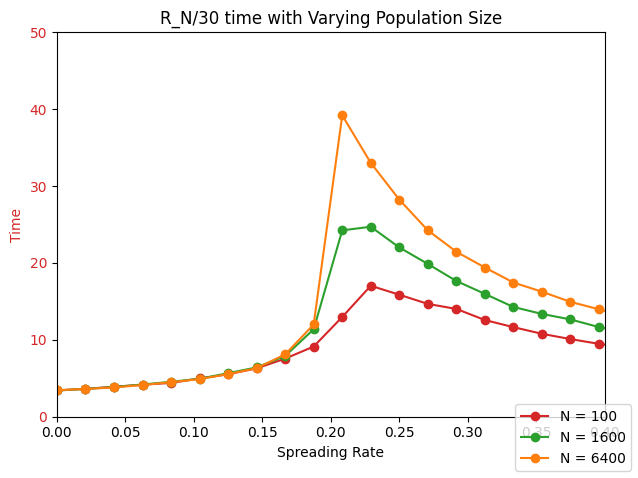

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Spreading Rate')
ax1.set_ylabel('Time', color=color)
ax1.plot(b, pmixingn301, color=color, marker = 'o', label= 'N = 100')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xlim(0, 0.4)
ax1.set_ylim(0, 50)

color = 'tab:green'
ax1.plot(b, pmixingn302, color=color, marker = 'o', label = 'N = 1600')

color = 'tab:orange'
ax1.plot(b, pmixingn303, color=color, marker = 'o', label = 'N = 6400')

fig.legend(loc = 'lower right')
plt.title('R_N/30 time with Varying Population Size')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
